In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
daily_model = pd.read_csv("daily_model.csv")
weekly_model = pd.read_csv("weekly_model.csv")
monthly_model = pd.read_csv("monthly_model.csv")

In [5]:
daily_model.shape

(37519, 153)

In [6]:
weekly_model.shape

(34223, 155)

In [7]:
monthly_model.shape

(39934, 159)

In [7]:
daily_model.drop(['alert_id_fk','owner_name','hru','indicator_pairs_SplitResultSet','classification'],axis=1,inplace=True)
weekly_model.drop(['alert_id_fk','owner_name','hru','indicator_pairs_SplitResultSet','classification'],axis=1,inplace=True)
monthly_model.drop(['alert_id_fk','owner_name','hru','indicator_pairs_SplitResultSet','classification'],axis=1,inplace=True)

In [8]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(daily_model)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(7,3))
plt.plot(K,distortions,'bx-')
plt.xticks(K,K)
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for daily heat cluster')
plt.show()

In [11]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(weekly_model)
    distortions.append(kmeanModel.inertia_)

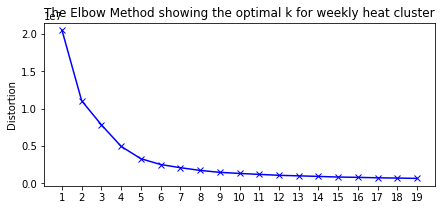

In [12]:
plt.figure(figsize=(7,3))
plt.plot(K,distortions,'bx-')
plt.xticks(K,K)
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for weekly heat cluster')
plt.show()

In [13]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(monthly_model)
    distortions.append(kmeanModel.inertia_)

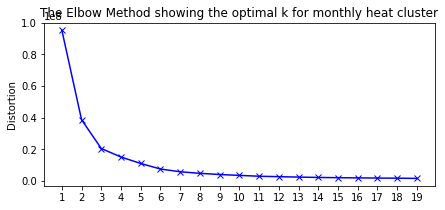

In [14]:
plt.figure(figsize=(7,3))
plt.plot(K,distortions,'bx-')
plt.xticks(K,K)
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for monthly heat cluster')
plt.show()

In [15]:
daily_model = pd.read_csv("./daily_model.csv")
weekly_model = pd.read_csv("./weekly_model.csv")
monthly_model = pd.read_csv("./monthly_model.csv")

In [16]:
daily_model.drop(['alert_id_fk','owner_name','hru','indicator_pairs_SplitResultSet','TP/DE','TP/HIGH','FP','TP/LOW'],axis=1,inplace=True)
weekly_model.drop(['alert_id_fk','owner_name','hru','indicator_pairs_SplitResultSet','TP/DE','TP/HIGH','FP','TP/LOW'],axis=1,inplace=True)
monthly_model.drop(['alert_id_fk','owner_name','hru','indicator_pairs_SplitResultSet','TP/DE','TP/HIGH','FP','TP/LOW'],axis=1,inplace=True)

In [17]:
from sklearn import preprocessing  
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
daily_model['risk_factor']=sc_X.fit_transform(np.array(daily_model['risk_factor'])[:,None])
daily_model['Tenure']=sc_X.fit_transform(np.array(daily_model['Tenure'])[:,None])
classification_mapping = {'TP/HIGH':1,'TP/DE':0,'TP/LOW':0,'FP':0}
daily_model['classification'] = daily_model['classification'].map(classification_mapping)   

In [19]:
X=daily_model.drop('classification',axis=1)
y=daily_model['classification']
seed=50

# X = X.fillna(X.mean())
# y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
model_resampled = RandomForestClassifier(n_estimators=600, 
                               bootstrap = True,
                               max_features = 'auto', n_jobs=-1, verbose = 1)

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek().fit_resample(X_train, y_train)
# X_resampled, y_resampled = X_train, y_train
model_resampled.fit(X_resampled, y_resampled)

Using TensorFlow backend.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    8.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [20]:
train_probs = model_resampled.predict_proba(X_train)[:,1]
probs = model_resampled.predict_proba(X_test)[:,1]
train_predictions = model_resampled.predict(X_train)
predictions = model_resampled.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.4s finished
[

In [21]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5

    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)

    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
 
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves')

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 20)
    plt.yticks(tick_marks, classes, size = 20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 30,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 20)
    plt.xlabel('Predicted label', size = 20)

In [23]:
train_probs = model_resampled.predict_proba(X_train)[:,1]
probs = model_resampled.predict_proba(X_test)[:,1]
train_predictions = model_resampled.predict(X_train)
predictions = model_resampled.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.5s finished
[

Confusion matrix, without normalization
[[10333   514]
 [  173   236]]


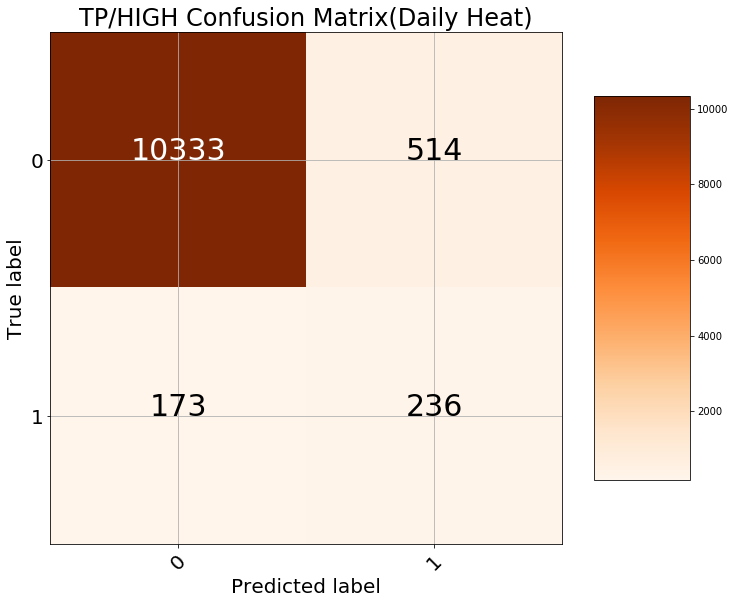

In [24]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['0','1'],
                      title = 'TP/HIGH Confusion Matrix(Daily Heat)')

Recall Baseline: 1.0 Test: 0.58 Train: 0.93
Precision Baseline: 0.04 Test: 0.31 Train: 0.55
Roc Baseline: 0.5 Test: 0.95 Train: 0.99


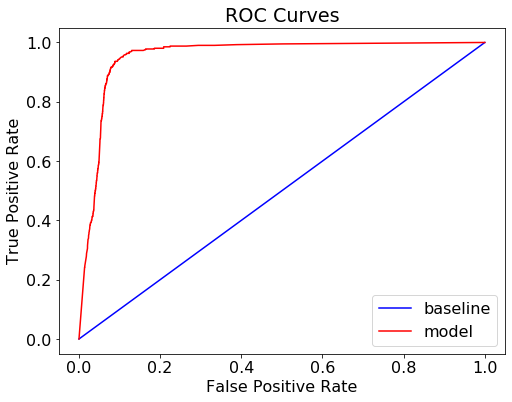

In [25]:
evaluate_model(predictions, probs, train_predictions, train_probs)

In [26]:
weekly_model['risk_factor']=sc_X.fit_transform(np.array(weekly_model['risk_factor'])[:,None])
weekly_model['Tenure']=sc_X.fit_transform(np.array(weekly_model['Tenure'])[:,None])
classification_mapping = {'TP/HIGH':1,'TP/DE':0,'TP/LOW':0,'FP':0}
weekly_model['classification'] = weekly_model['classification'].map(classification_mapping)  

In [27]:
X=weekly_model.drop(['classification'],axis=1)
y=weekly_model['classification']
seed=50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
model_resampled = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'auto', n_jobs=-1, verbose = 1)

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek().fit_resample(X_train, y_train)
# X_resampled, y_resampled = X_train, y_train
model_resampled.fit(X_resampled, y_resampled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [28]:
train_probs = model_resampled.predict_proba(X_train)[:,1]
probs = model_resampled.predict_proba(X_test)[:,1]
train_predictions = model_resampled.predict(X_train)
predictions = model_resampled.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.3s finished
[

Confusion matrix, without normalization
[[6253  197]
 [ 105  290]]


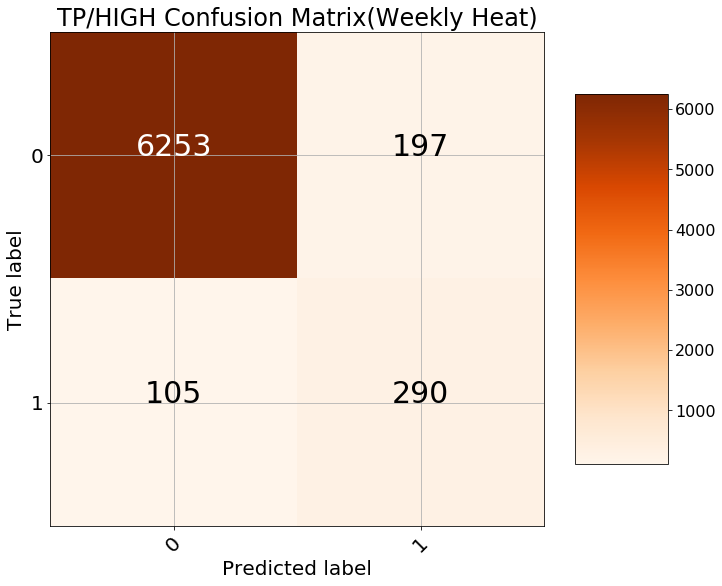

In [29]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['0','1'],
                      title = 'TP/HIGH Confusion Matrix(Weekly Heat)')

Recall Baseline: 1.0 Test: 0.73 Train: 0.98
Precision Baseline: 0.06 Test: 0.6 Train: 0.7
Roc Baseline: 0.5 Test: 0.98 Train: 0.99


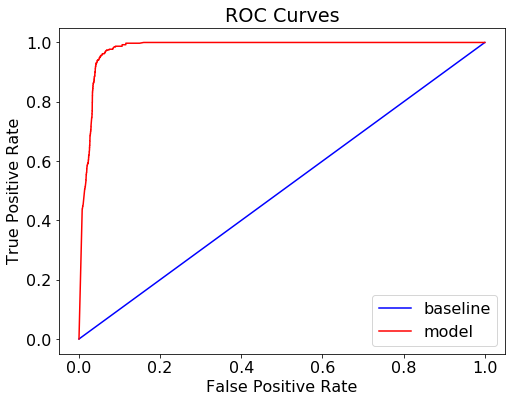

In [30]:
evaluate_model(predictions, probs, train_predictions, train_probs)

In [31]:
monthly_model = pd.read_csv("/Users/bravery_simon/Desktop/weekly_model.csv")
monthly_model.drop(['alert_id_fk','owner_name','hru','indicator_pairs_SplitResultSet','TP/DE','TP/HIGH','FP','TP/LOW'],axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
monthly_model['risk_factor']=sc_X.fit_transform(np.array(monthly_model['risk_factor'])[:,None])
monthly_model['Tenure']=sc_X.fit_transform(np.array(monthly_model['Tenure'])[:,None])
classification_mapping = {'TP/HIGH':1,'TP/DE':0,'TP/LOW':0,'FP':0}
monthly_model['classification'] = monthly_model['classification'].map(classification_mapping)  

In [32]:
X=monthly_model.drop(['classification'],axis=1)
y=monthly_model['classification']
seed=50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
model_resampled = RandomForestClassifier(n_estimators=600, 
                               bootstrap = True,
                               max_features = 'auto', n_jobs=-1, verbose = 1)

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek().fit_resample(X_train, y_train)
# X_resampled, y_resampled = X_train, y_train
model_resampled.fit(X_resampled, y_resampled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    7.3s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [33]:
train_probs = model_resampled.predict_proba(X_train)[:,1]
probs = model_resampled.predict_proba(X_test)[:,1]
train_predictions = model_resampled.predict(X_train)
predictions = model_resampled.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.4s finished
[

Confusion matrix, without normalization
[[6252  198]
 [  96  299]]


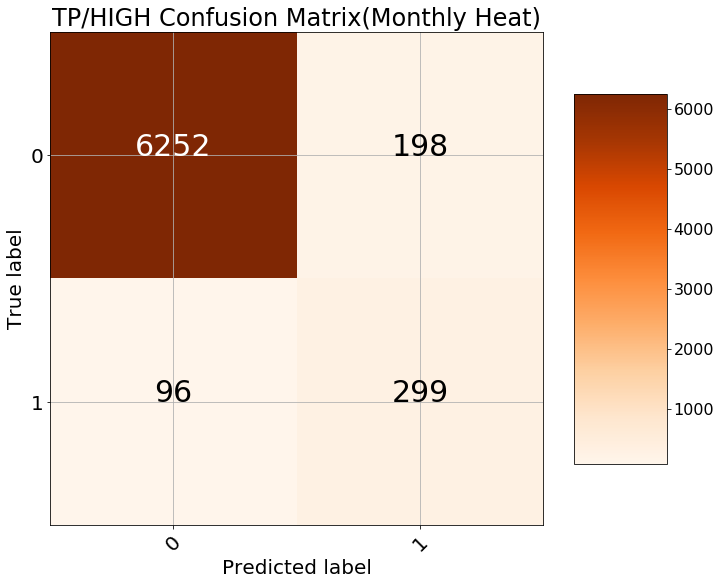

In [34]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['0','1'],
                      title = 'TP/HIGH Confusion Matrix(Monthly Heat)')

Recall Baseline: 1.0 Test: 0.76 Train: 0.98
Precision Baseline: 0.06 Test: 0.6 Train: 0.7
Roc Baseline: 0.5 Test: 0.98 Train: 0.99


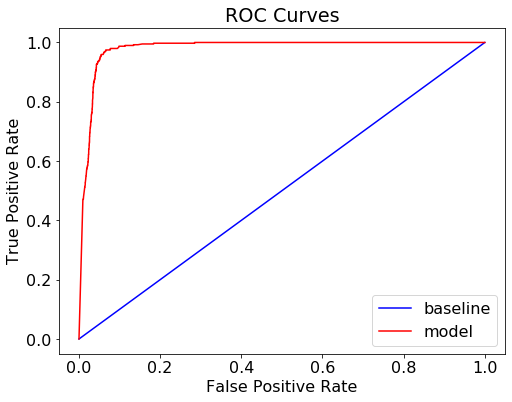

In [35]:
evaluate_model(predictions, probs, train_predictions, train_probs)

In [36]:
daily_model = pd.read_csv("/Users/bravery_simon/Desktop/daily_model.csv")
weekly_model = pd.read_csv("/Users/bravery_simon/Desktop/weekly_model.csv")
monthly_model = pd.read_csv("/Users/bravery_simon/Desktop/monthly_model.csv")
datasets=[daily_model,weekly_model,monthly_model]
for dataset in datasets:
    dataset.drop(['alert_id_fk','owner_name','hru','indicator_pairs_SplitResultSet','TP/DE','TP/HIGH','FP','TP/LOW'],axis=1,inplace=True)
    dataset['risk_factor']=sc_X.fit_transform(np.array(dataset['risk_factor'])[:,None])
    dataset['Tenure']=sc_X.fit_transform(np.array(dataset['Tenure'])[:,None])
classification_mapping = {'TP/HIGH':1,'TP/DE':0,'TP/LOW':1,'FP':0}
for dataset in datasets:
    dataset['classification'] = dataset['classification'].map(classification_mapping)  

In [37]:
X=monthly_model.drop(['classification'],axis=1)
y=monthly_model['classification']
seed=50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
model_resampled = RandomForestClassifier(n_estimators=600, 
                               bootstrap = True,
                               max_features = 'auto', n_jobs=-1, verbose = 1)

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek().fit_resample(X_train, y_train)
# X_resampled, y_resampled = X_train, y_train
model_resampled.fit(X_resampled, y_resampled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   10.7s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [38]:
train_probs = model_resampled.predict_proba(X_train)[:,1]
probs = model_resampled.predict_proba(X_test)[:,1]
train_predictions = model_resampled.predict(X_train)
predictions = model_resampled.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.6s finished
[

Confusion matrix, without normalization
[[6591  252]
 [ 129 1015]]


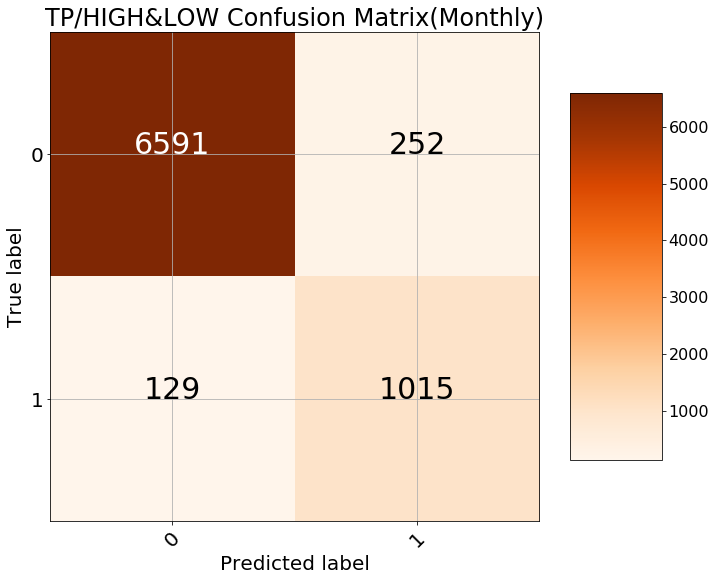

In [39]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['0','1'],
                      title = 'TP/HIGH&LOW Confusion Matrix(Monthly)')

Recall Baseline: 1.0 Test: 0.89 Train: 0.98
Precision Baseline: 0.14 Test: 0.8 Train: 0.88
Roc Baseline: 0.5 Test: 0.98 Train: 1.0


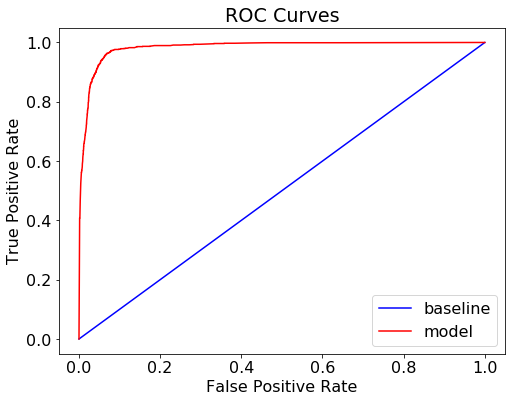

In [40]:
evaluate_model(predictions, probs, train_predictions, train_probs)

In [41]:
X=weekly_model.drop(['classification'],axis=1)
y=weekly_model['classification']
seed=50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
model_resampled = RandomForestClassifier(n_estimators=800, 
                               bootstrap = True,
                               max_features = 'auto', n_jobs=-1, verbose = 1)

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek().fit_resample(X_train, y_train)
# X_resampled, y_resampled = X_train, y_train
model_resampled.fit(X_resampled, y_resampled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   10.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [42]:
train_probs = model_resampled.predict_proba(X_train)[:,1]
probs = model_resampled.predict_proba(X_test)[:,1]
train_predictions = model_resampled.predict(X_train)
predictions = model_resampled.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(

Confusion matrix, without normalization
[[5517  222]
 [ 118  988]]


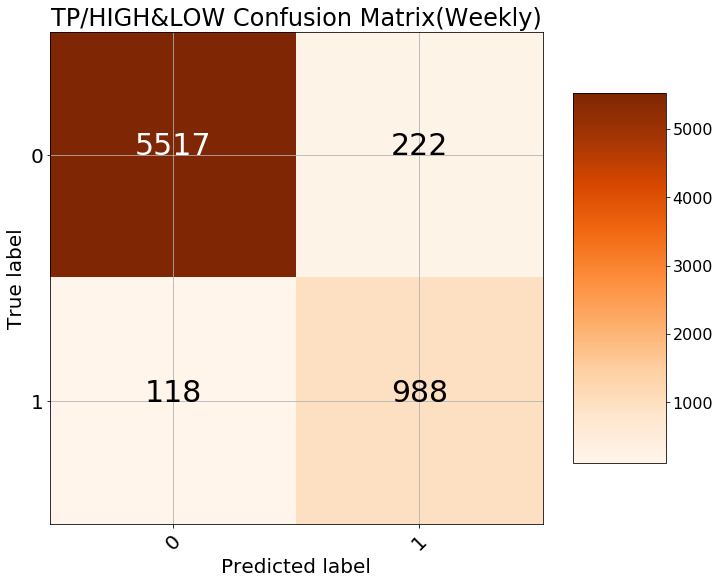

In [43]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['0','1'],
                      title = 'TP/HIGH&LOW Confusion Matrix(Weekly)')

Recall Baseline: 1.0 Test: 0.89 Train: 0.98
Precision Baseline: 0.16 Test: 0.82 Train: 0.88
Roc Baseline: 0.5 Test: 0.98 Train: 1.0


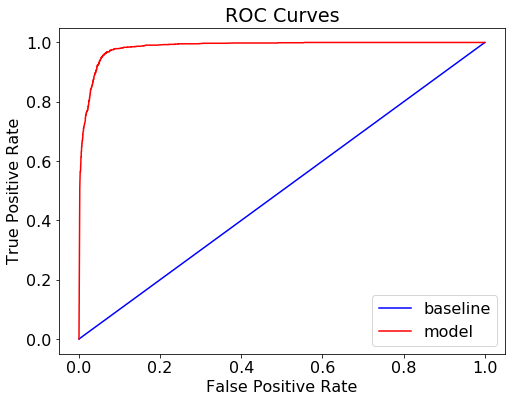

In [44]:
evaluate_model(predictions, probs, train_predictions, train_probs)

In [45]:
X=daily_model.drop('classification',axis=1)
y=daily_model['classification']
seed=50

# X = X.fillna(X.mean())
# y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
model_resampled = RandomForestClassifier(n_estimators=800, 
                               bootstrap = True,
                               max_features = 'auto', n_jobs=-1, verbose = 1)

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek().fit_resample(X_train, y_train)
# X_resampled, y_resampled = X_train, y_train
model_resampled.fit(X_resampled, y_resampled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   10.5s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [46]:
train_probs = model_resampled.predict_proba(X_train)[:,1]
probs = model_resampled.predict_proba(X_test)[:,1]
train_predictions = model_resampled.predict(X_train)
predictions = model_resampled.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(

Confusion matrix, without normalization
[[9286  563]
 [ 254 1153]]


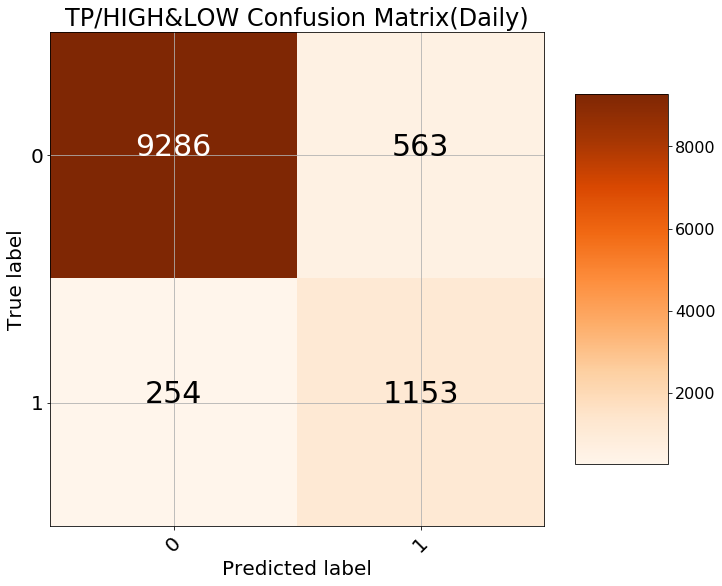

In [47]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['0','1'],
                      title = 'TP/HIGH&LOW Confusion Matrix(Daily)')

Recall Baseline: 1.0 Test: 0.82 Train: 0.96
Precision Baseline: 0.12 Test: 0.67 Train: 0.83
Roc Baseline: 0.5 Test: 0.96 Train: 0.99


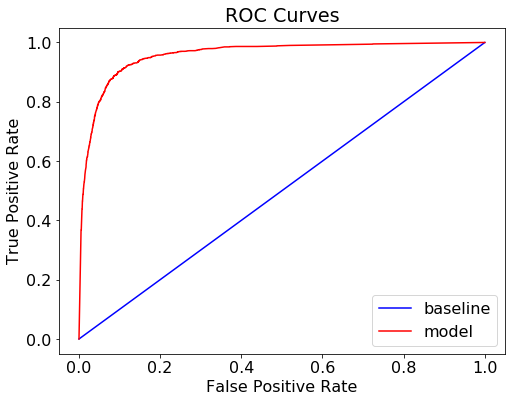

In [48]:
evaluate_model(predictions, probs, train_predictions, train_probs)

In [49]:
acc_rfc = round(model_resampled.score(X_resampled, y_resampled)*100,2)
acc_rfc

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    1.3s finished


98.95

Recall Baseline: 1.0 Test: 0.98 Train: 0.98
Precision Baseline: 0.12 Test: 0.16 Train: 0.16
Roc Baseline: 0.5 Test: 0.61 Train: 0.61


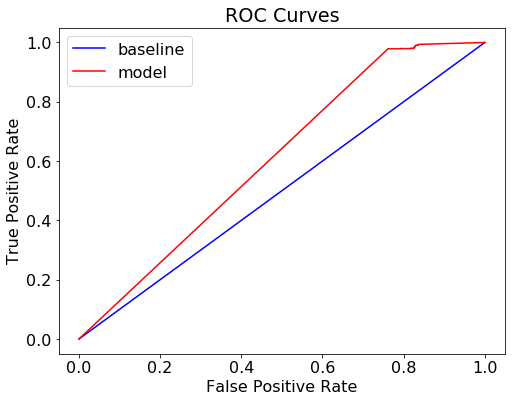

In [50]:
from sklearn.naive_bayes import GaussianNB
X=daily_model.drop('classification',axis=1)
y=daily_model['classification']
seed=50

# X = X.fillna(X.mean())
# y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
gaussian = GaussianNB()

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek().fit_resample(X_train, y_train)
# X_resampled, y_resampled = X_train, y_train
gaussian.fit(X_resampled, y_resampled)
train_probs = gaussian.predict_proba(X_train)[:,1]
probs = gaussian.predict_proba(X_test)[:,1]
train_predictions = gaussian.predict(X_train)
predictions = gaussian.predict(X_test)
evaluate_model(predictions, probs, train_predictions, train_probs)

Confusion matrix, without normalization
[[2348 7501]
 [  30 1377]]


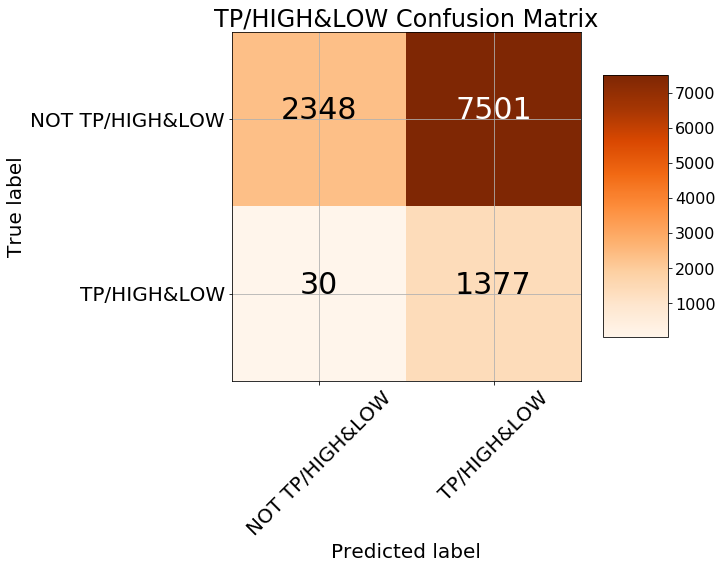

In [51]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['NOT TP/HIGH&LOW','TP/HIGH&LOW'],
                      title = 'TP/HIGH&LOW Confusion Matrix')

In [52]:
acc_gaussian = round(gaussian.score(X_resampled, y_resampled)*100,2)
acc_gaussian

62.25

In [53]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
svc = SVC()

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek().fit_resample(X_train, y_train)
# X_resampled, y_resampled = X_train, y_train
svc.fit(X_resampled, y_resampled)

#train_probs = svc.predict_proba(X_train)[:,1]
#probs = svc.predict_proba(X_test)[:,1]
train_predictions = svc.predict(X_train)
predictions = svc.predict(X_test)

Confusion matrix, without normalization
[[8866  983]
 [ 260 1147]]


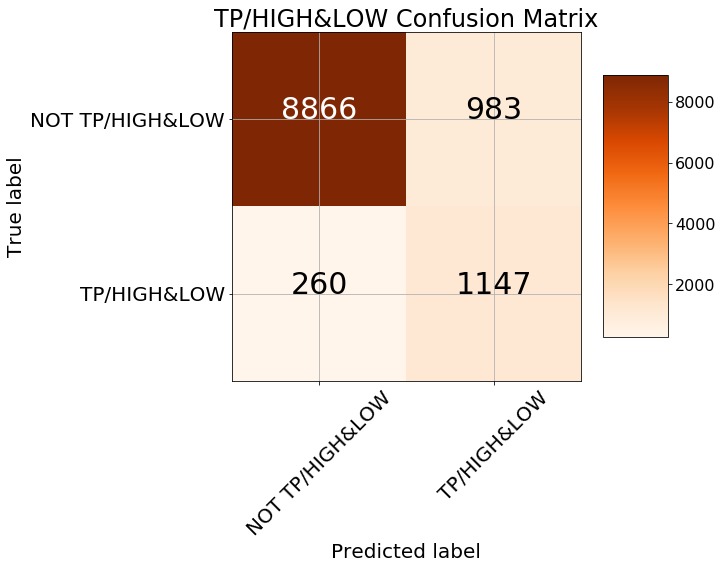

In [55]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['NOT TP/HIGH&LOW','TP/HIGH&LOW'],
                      title = 'TP/HIGH&LOW Confusion Matrix')

In [56]:
acc_svc=round(svc.score(X_resampled, y_resampled)*100,2)
acc_svc

91.31

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
knn = KNeighborsClassifier(n_neighbors=8)

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek().fit_resample(X_train, y_train)
# X_resampled, y_resampled = X_train, y_train
knn.fit(X_resampled, y_resampled)
train_probs = knn.predict_proba(X_train)[:,1]
probs = knn.predict_proba(X_test)[:,1]
train_predictions = knn.predict(X_train)
predictions = knn.predict(X_test)

Recall Baseline: 1.0 Test: 0.87 Train: 0.93
Precision Baseline: 0.12 Test: 0.53 Train: 0.61
Roc Baseline: 0.5 Test: 0.94 Train: 0.98


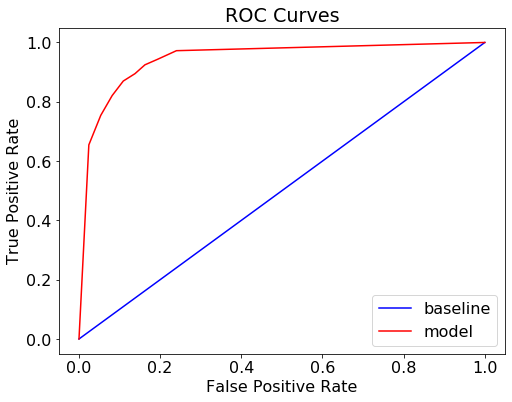

In [58]:
evaluate_model(predictions, probs, train_predictions, train_probs)

Confusion matrix, without normalization
[[8774 1075]
 [ 183 1224]]


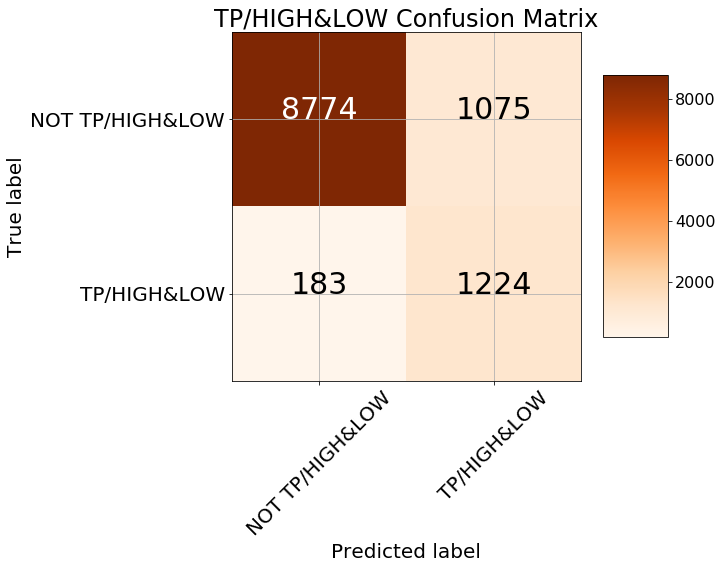

In [59]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['NOT TP/HIGH&LOW','TP/HIGH&LOW'],
                      title = 'TP/HIGH&LOW Confusion Matrix')

In [60]:
acc_knn=round(knn.score(X_resampled, y_resampled)*100,2)
acc_knn

94.74

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
decision_tree = DecisionTreeClassifier()

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek().fit_resample(X_train, y_train)
# X_resampled, y_resampled = X_train, y_train
decision_tree.fit(X_resampled, y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
train_probs = decision_tree.predict_proba(X_train)[:,1]
probs = decision_tree.predict_proba(X_test)[:,1]
train_predictions = decision_tree.predict(X_train)
predictions = decision_tree.predict(X_test)

Recall Baseline: 1.0 Test: 0.82 Train: 0.89
Precision Baseline: 0.12 Test: 0.67 Train: 0.89
Roc Baseline: 0.5 Test: 0.9 Train: 0.99


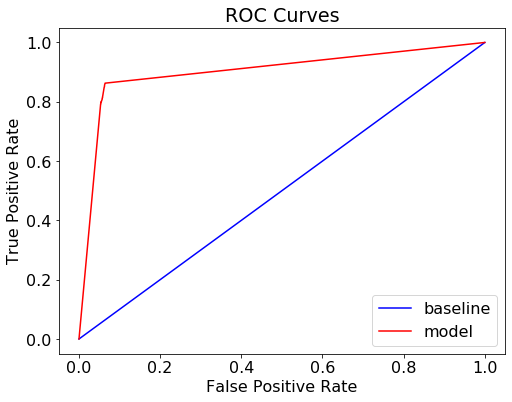

In [63]:
evaluate_model(predictions, probs, train_predictions, train_probs)

Confusion matrix, without normalization
[[9278  571]
 [ 260 1147]]


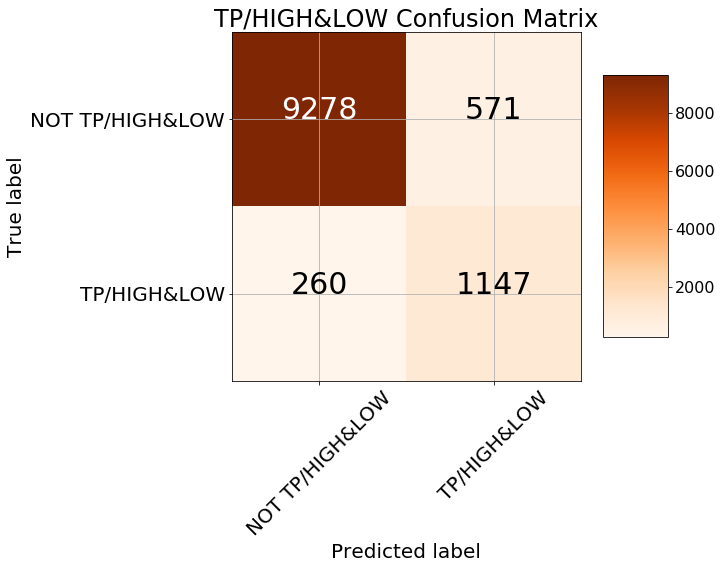

In [64]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['NOT TP/HIGH&LOW','TP/HIGH&LOW'],
                      title = 'TP/HIGH&LOW Confusion Matrix')

In [65]:
acc_decision_tree=round(decision_tree.score(X_resampled, y_resampled)*100,2)
acc_decision_tree

98.95

Confusion matrix, without normalization
[[9278  571]
 [ 260 1147]]


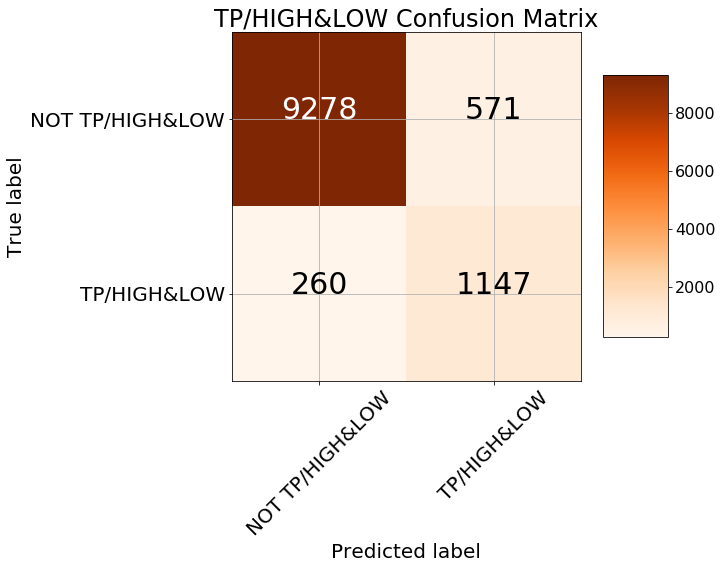

In [66]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['NOT TP/HIGH&LOW','TP/HIGH&LOW'],
                      title = 'TP/HIGH&LOW Confusion Matrix')

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
    from imblearn.combine import SMOTETomek
    X_resampled, y_resampled = SMOTETomek().fit_resample(X_train, y_train)
# X_resampled, y_resampled = X_train, y_train
    gb.fit(X_resampled, y_resampled)

In [68]:
train_probs = gb.predict_proba(X_train)[:,1]
probs = gb.predict_proba(X_test)[:,1]
train_predictions = gb.predict(X_train)
predictions = gb.predict(X_test)

Recall Baseline: 1.0 Test: 0.68 Train: 0.69
Precision Baseline: 0.12 Test: 0.21 Train: 0.21
Roc Baseline: 0.5 Test: 0.73 Train: 0.73


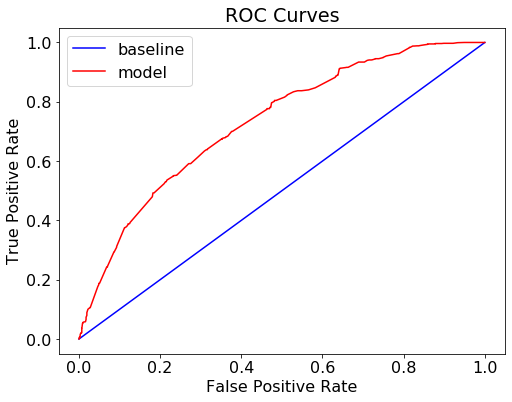

In [69]:
evaluate_model(predictions, probs, train_predictions, train_probs)

Confusion matrix, without normalization
[[6373 3476]
 [ 457  950]]


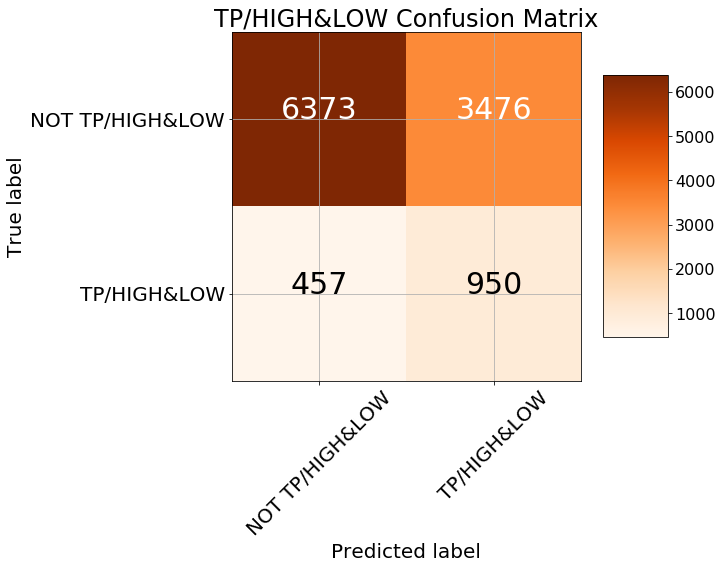

In [70]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['NOT TP/HIGH&LOW','TP/HIGH&LOW'],
                      title = 'TP/HIGH&LOW Confusion Matrix')

In [71]:
acc_gb=round(gb.score(X_resampled, y_resampled)*100,2)
acc_gb

67.46

In [72]:
models = pd.DataFrame({'Model':['Support Vector Machines', 'KNN', 'Random Forest', 'Naive Bayes', 'Gradient Boosting',
              'Decision Tree'],'Score':[acc_svc, acc_knn, acc_rfc, acc_gaussian,acc_gb,acc_decision_tree]})
models.sort_values(by='Score',ascending=False)

,Model,Score
2,Random Forest,98.95
5,Decision Tree,98.95
1,KNN,94.74
0,Support Vector Machines,91.31
4,Gradient Boosting,67.46
3,Naive Bayes,62.25
